In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
try:
 df = pd.read_csv("C:/Users/chand/OneDrive/Desktop/Python Project/Cleaned Data/final_cleaned_data.csv")
 latest = df.sort_values("date").drop_duplicates("location", keep="last")
except Exception as e:
    print(f" {e} Error:")

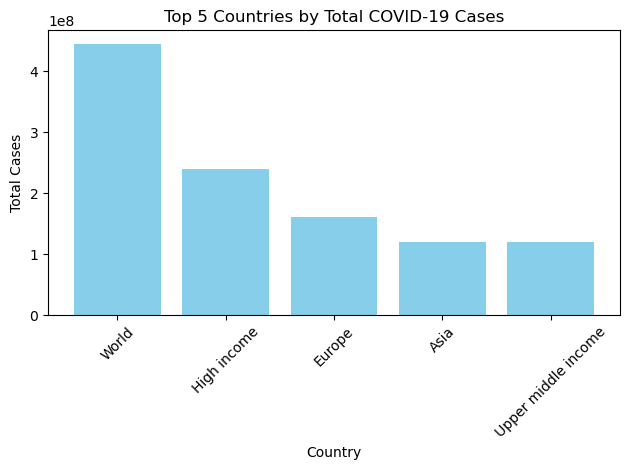

In [5]:
# Chart : 1
top5_cases = latest.nlargest(5, 'total_cases')
plt.bar(top5_cases["location"], top5_cases["total_cases"], color="skyblue")
plt.title("Top 5 Countries by Total COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

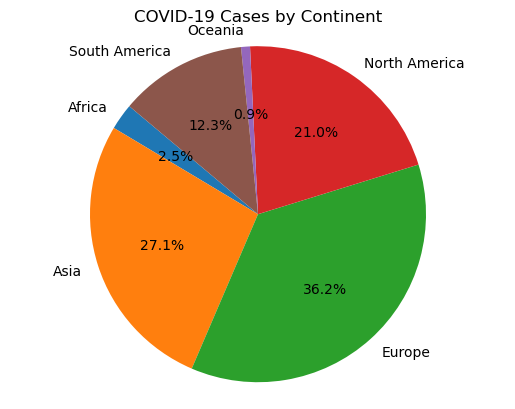

In [14]:
# Chart : 2
continent_cases = latest.groupby("continent")["total_cases"].sum()
plt.pie(continent_cases, labels=continent_cases.index, autopct="%1.1f%%", startangle=140)
plt.title("COVID-19 Cases by Continent")
plt.axis("equal")
plt.show()

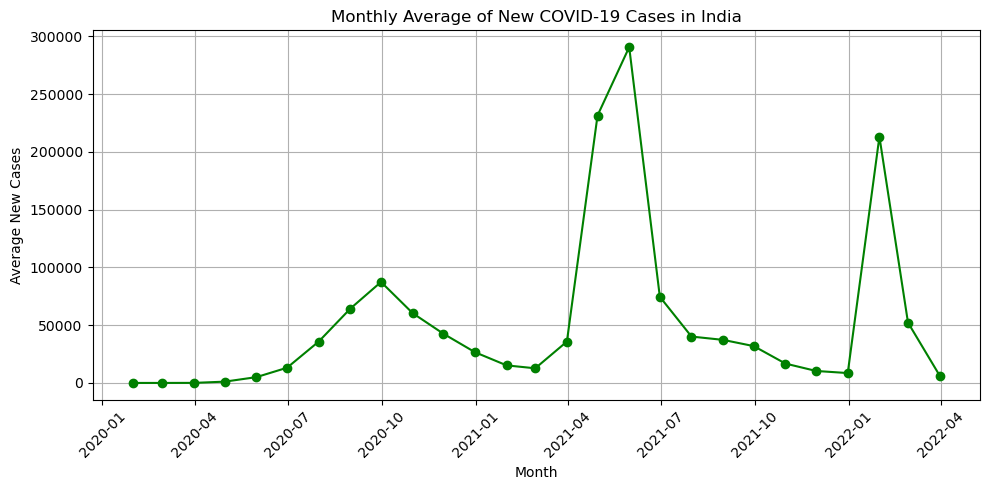

In [24]:
# Chart : 3
india = df[df["location"] == "India"].copy()
india.loc[:, "date"] = pd.to_datetime(india["date"])
india_monthly = india.resample('ME', on='date')["new_cases"].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(india_monthly["date"], india_monthly["new_cases"], color="green", marker='o')
plt.title("Monthly Average of New COVID-19 Cases in India")
plt.xlabel("Month")
plt.ylabel("Average New Cases")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

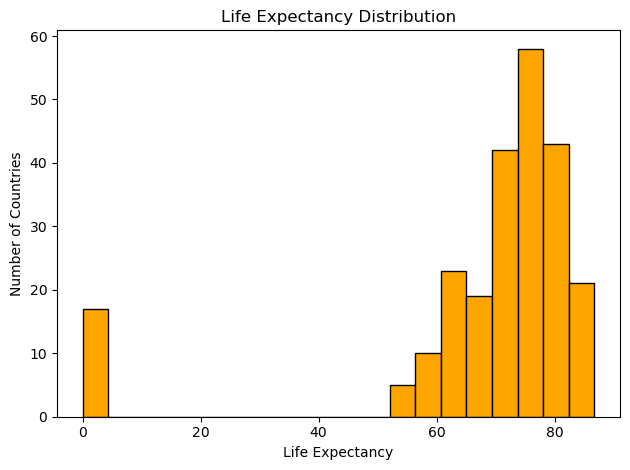

In [31]:
# Chart : 4
plt.hist(latest["life_expectancy"].dropna(), bins=20, color="orange", edgecolor="black")
plt.title("Life Expectancy Distribution")
plt.xlabel("Life Expectancy")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

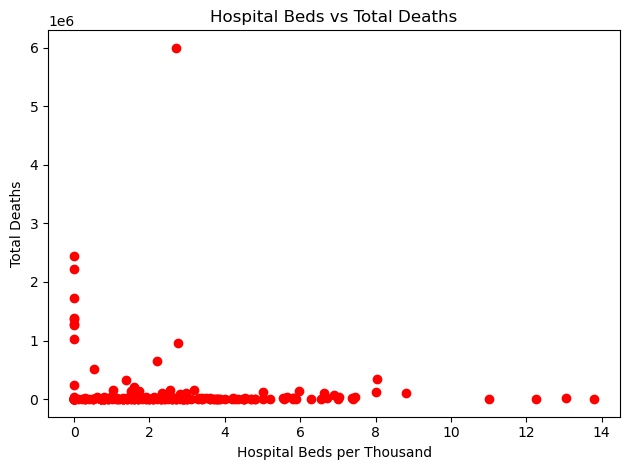

In [33]:
# Chart : 5
plt.scatter(latest["hospital_beds_per_thousand"], latest["total_deaths"], color="red")
plt.title("Hospital Beds vs Total Deaths")
plt.xlabel("Hospital Beds per Thousand")
plt.ylabel("Total Deaths")
plt.tight_layout()
plt.show()

continent
Africa            855.0
Asia             4529.0
Europe           1820.0
North America    4442.0
Oceania           155.0
South America    4148.0
Name: new_deaths, dtype: float64


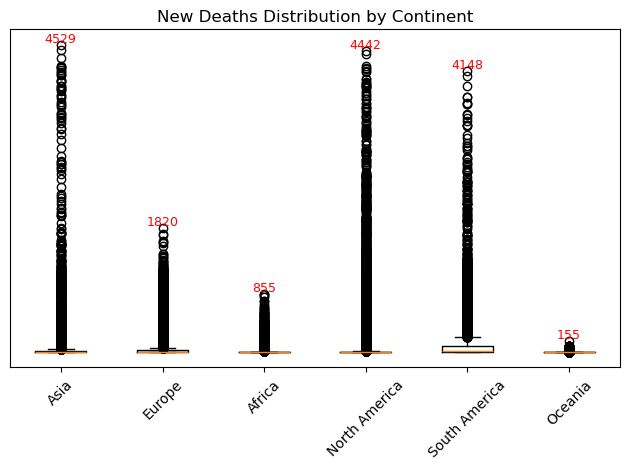

In [26]:
# Chart : 6
print(df.groupby("continent")["new_deaths"].max().dropna())
continents=df["continent"].dropna().unique()
data=[df[df["continent"]==c]["new_deaths"].dropna() for c in continents]
max_values=df.groupby("continent")["new_deaths"].max().dropna()
plt.boxplot(data,tick_labels=continents)
plt.title("New Deaths Distribution by Continent")
plt.ylabel('')
plt.yticks([])
plt.xticks(rotation=45)
positions=range(1,len(continents)+1)
for pos,cont in zip(positions,continents):
    plt.text(pos,max_values[cont],f'{int(max_values[cont])}',ha='center',va='bottom',fontsize=9,color='red')
plt.tight_layout()
plt.show()

Max total cases per year for India:
   year  total_cases
0  2020   10286709.0
1  2021   34861579.0
2  2022   42962953.0

Max total cases per year for Brazil:
   year  total_cases
0  2020    7681032.0
1  2021   22291839.0
2  2022   29040800.0

Max total cases per year for United States:
   year  total_cases
0  2020   20193136.0
1  2021   54810020.0
2  2022   79265726.0



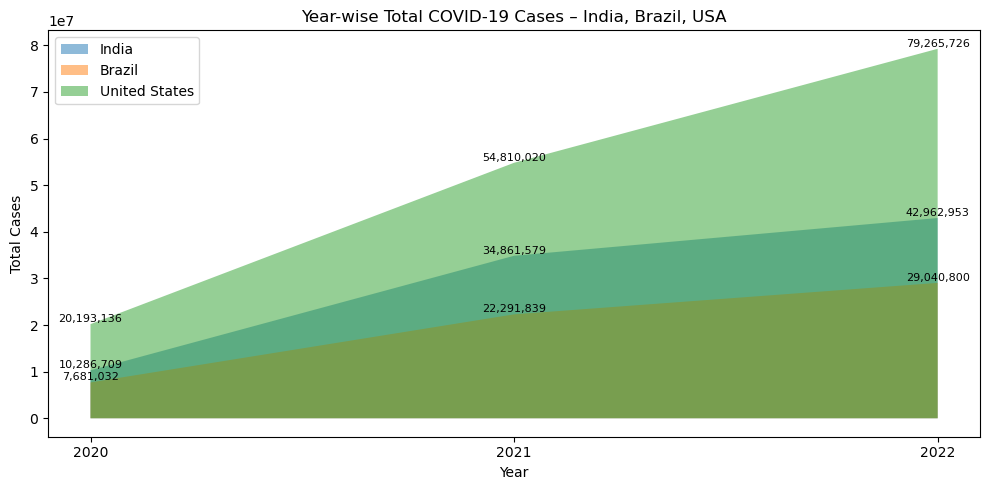

In [27]:
# Chart : 7
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
countries = ["India", "Brazil", "United States"]
plt.figure(figsize=(10,5))
for country in countries:
    data = df[df["location"] == country].groupby("year")["total_cases"].max().reset_index()
    print(f"Max total cases per year for {country}:")
    print(data)
    print()
    plt.fill_between(data["year"], data["total_cases"], alpha=0.5, label=country)
    for x, y in zip(data["year"], data["total_cases"]):
        plt.text(x, y, f"{int(y):,}", ha="center", va="bottom", fontsize=8)
plt.title("Year-wise Total COVID-19 Cases – India, Brazil, USA")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.legend()
plt.xticks(data["year"])
plt.tight_layout()
plt.show()